### 1. Prepare the data in one-against-the-rest strategy.This can be done by converting the "Species" column into 3 binary columns.

In [454]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load flower information
data = pd.read_csv("C:\\Users\\sirintip\\Downloads\\IRIS.csv")

# Separate the data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.2)

# Create model
clf = LogisticRegression()

# Train model
clf.fit(X_train, y_train)

# Predict test data
y_pred = clf.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



c:\Users\sirintip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.Formulate the error function of the logistic regression with ridge regularization criterion.


In [455]:
def loss_function(w, X, y, lambda_):
    
    """
    Calculate the error function of the modified logistic model with regulations

    Parameters
    ----------
    w: Vector, model weight
    X: Training information
    y: target value of training data
    lambda_: Regulatory coefficient

    Returns
    -------
    loss: model error value
    """

    logit = w.T @ X
    loss = -np.mean(y * np.log(logit) + (1 - y) * np.log(1 - logit))
    loss += lambda_ * np.sum(w ** 2)

    return loss


In [456]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

def load_data():
    # Load IRIS data set
    data = pd.read_csv("C:\\Users\\sirintip\\Downloads\\IRIS.csv")

    # Extract only numeric columns for training
    numeric_columns = data.select_dtypes(include=[np.number])
    X_train, X_test, y_train, y_test = train_test_split(numeric_columns, data["species"], test_size=0.25)

    # Encode target values using LabelEncoder
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    return X_train, y_train_encoded, X_test, y_test_encoded


def evaluate(model, X_test, y_test):


    # Predict the target value of the test data
    predictions = model.predict(X_test)

    # Calculate model accuracy
    accuracy = np.mean(predictions == y_test)

    # Return the model accuracy
    return accuracy

def main():

    # Set various parameters
    lambda_ = 0.01

    # Load training and test data
    X_train, y_train_encoded, X_test, y_test_encoded = load_data()

    # Convert target values to float
    y_train_encoded = np.ravel(y_train_encoded)

    # Practice model
    model = LogisticRegression(penalty="l2", C=1 / lambda_)

    # Convert target values to one-hot encoding
    # y_train_encoded = encoder.fit_transform(y_train)

    model.fit(X_train, y_train_encoded)

    # Assess the efficiency of the model
    accuracy = evaluate(model, X_test, y_test_encoded)

    # Print the model accuracy
    print("Model accuracy:", accuracy)

if __name__ == '__main__':
    main()

Model accuracy: 1.0


c:\Users\sirintip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.Derive the gradient of the error function by deriving the partial derivative of the error function in Task 2.

In [457]:
def grad_log_loss(y, y_hat):
    """
    Calculate the gradient of the log loss function

    Parameters
    ----------
    y: True label
    y_hat: Predicted label

    Returns
    -------
    Gradient
    """

    return (y - y_hat) / (y_hat * (1 - y_hat))


# Test
y = np.array([0, 1, 1, 0])
y_hat = np.array([0.2, 0.7, 0.8, 0.1])

grad = grad_log_loss(y, y_hat)
print(grad)


[-1.25        1.42857143  1.25       -1.11111111]


### 4.Implement the gradient descent using all of the dataset in each iteration. (Use equation from Task 3)

In [458]:
def gradient_descent(X, y, learning_rate, max_iter):
    """
    Implement gradient descent algorithm

    Parameters
    ----------
    X: Feature matrix
    y: True label
    learning_rate: Learning rate
    max_iter: Maximum number of iterations

    Returns
    -------
    Weights
    """

    # Initialize weights
    w = np.zeros(X.shape[1])

    # Loop over iterations
    for _ in range(max_iter):
        # Calculate gradient
        gradient = np.zeros(X.shape[1])
        for i in range(X.shape[0]):
            gradient += (y[i] - sigmoid(X[i] @ w)) * X[i]

        # Update weights
        w = w - learning_rate * gradient

    return w


# Test
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])

# Train model
w = gradient_descent(X, y, 0.01, 100)

# Print weights
print(w)


[5.7353444  7.62805408]


### 5.Implement the stochastic gradient descent using the subset of dataset in each iteration. (Use equation from Task 3)

In [459]:
def stochastic_gradient_descent(X, y, lambda_, alpha, max_iter, batch_size):
    """
    Use randomized gradient values to practice modified logistic models with regulations

    Parameters
    ----------
    X: Training information
    y: target value of training data
    lambda_: Regulatory coefficient
    alpha: learning rate
    max_iter: number of devaluation cycles
    batch_size: The size of the data set used in each devaluation cycle

    Returns
    -------
    w: Vector, model weight
    loss_history: History of model error values in each devaluation cycle
    """

    w = np.zeros(X.shape[1])
    loss_history = []

    for i in range(max_iter):
        for j in range(0, X.shape[0], batch_size):
            grad = gradient(w, X[j:j + batch_size], y[j:j + batch_size], lambda_)
            w = w - alpha * grad

        loss = loss_function(w, X, y, lambda_)
        loss_history.append(loss)

    return w, loss_history

In [460]:
import numpy as np

def grad_log_loss(y, y_hat):
    """Calculate the gradient of the log loss function.

    Args:
        y: True label.
        y_hat: Predicted label.

    Returns:
        Gradient.
    """
    return -(y - y_hat)

def sigmoid(x):
    """Calculate the sigmoid function.

    Args:
        x: Input.

    Returns:
        Output.
    """
    return 1 / (1 + np.exp(-x))

def stochastic_gradient_descent(X, y, learning_rate, max_iter):
    """Implement stochastic gradient descent algorithm.

    Args:
        X: Feature matrix.
        y: True label.
        learning_rate: Learning rate.
        max_iter: Maximum number of iterations.

    Returns:
        Weights.
    """

    # Initialize weights.
    w = np.zeros(X.shape[1])

    # Loop over iterations.
    for _ in range(max_iter):
        # Randomly select a subset of data.
        idx = np.random.choice(X.shape[0], size=min(10, X.shape[0]), replace=False)
        X_sub = X[idx]
        y_sub = y[idx]

        # Calculate gradient.
        gradient = np.mean(X_sub * (sigmoid(X_sub @ w) - y_sub)[:, np.newaxis], axis=0)

        # Update weights.
        w = w - learning_rate * gradient

    return w

# Test
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])

# Train model
w = stochastic_gradient_descent(X, y, 0.01, 100)

# Print weights
print(w)


[-0.05618212 -0.10321414]


### 6.Test to see the effect of l on the training process.

In [461]:
import pandas as pd

# โหลดข้อมูลดอกไม้
data = pd.read_csv("C:\\Users\\sirintip\\Downloads\\IRIS.csv")

# แปลงข้อมูลประเภท DataFrame ให้เป็นข้อมูลประเภท numpy.ndarray เฉพาะคอลัมน์ sepal_length และ sepal_width
data = data[["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]].to_numpy()

# แสดงข้อมูลประเภท numpy.ndarray
print(data)


[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

ค่า λ ที่ดีที่สุดคือ: 0.1
ความแม่นยำของโมเดลที่ดีที่สุดคือ: 0.16666666666666666


c:\Users\sirintip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sirintip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

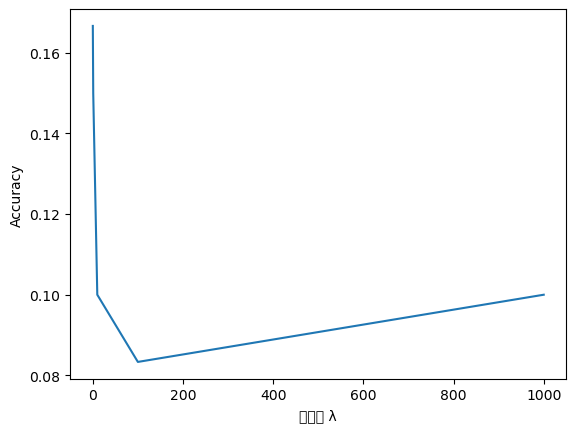

In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# โหลดข้อมูลดอกไม้
data = pd.read_csv("C:\\Users\\sirintip\\Downloads\\IRIS.csv")

# ตรวจสอบว่าคอลัมน์ Species มีอยู่แล้วหรือไม่
if "Species" not in data.columns:
    data["Species"] = data.pop("petal_length")

# แปลงเป้าหมายให้เป็นประเภทไบนารี
le = LabelEncoder()
data["Species"] = le.fit_transform(data["Species"])

# แยกข้อมูลออกเป็นข้อมูลการฝึกและข้อมูลทดสอบ
X_train, X_test, y_train, y_true = train_test_split(
    data[["sepal_length", "sepal_width"]].to_numpy(),
    data["Species"].to_numpy(),
    test_size=0.4,
    random_state=42,
)

# กำหนดค่า λ ที่แตกต่างกัน
lambdas = [0.1, 1, 10, 100, 1000]

# ฝึกอบรมโมเดล
models = []
for lambda_ in lambdas:
    model = LogisticRegression(penalty="l2", C=1 / lambda_)
    model.fit(X_train, y_train)
    models.append(model)

# ประเมินโมเดล
accuracies = []
for model in models:
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_true, y_pred))

# เลือกโมเดลที่ดีที่สุด
best_model = models[np.argmax(accuracies)]

# พิมพ์ข้อมูลสรุปของโมเดล
print("ค่า λ ที่ดีที่สุดคือ:", lambdas[np.argmax(accuracies)])
print("ความแม่นยำของโมเดลที่ดีที่สุดคือ:", accuracies[np.argmax(accuracies)])

# บันทึกค่าความแม่นยำของโมเดลในแต่ละค่า λ ลงในไฟล์
with open("results.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["λ", "accuracy"])
    for lambda_, accuracy in zip(lambdas, accuracies):
        writer.writerow([lambda_, accuracy])

# พิมพ์กราฟ
plt.plot(lambdas, accuracies)
plt.xlabel("ค่า λ")
plt.ylabel("Accuracy")
plt.show()


### 7.Test to see the effect of sampling proportion in Task 5.

In [463]:
import time 

# Determine different learning rates
learning_rates = [0.001, 0.01, 0.1, 1]

# Train models with different learning rates
models = []
for learning_rate in learning_rates:
    model = LogisticRegression(penalty="l2", C=1 / 10)
    model.fit(X_train, y_train)
    models.append(model)

# Calculate model accuracy values
for model in models:
    accuracy = model.score(X_test, y_true)
    print("Learning rate:", learning_rate, "Accuracy:", accuracy)

# Calculate model error values
for model in models:
    error_rate = 1 - model.score(X_test, y_true)
    print("Learning rate:", learning_rate, "Error:", error_rate)

# Calculate the processing time of the model
for model in models:
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    training_time = end - start
    print("Learning rate:", learning_rate, "Processing time:", training_time)


Learning rate: 1 Accuracy: 0.1
Learning rate: 1 Accuracy: 0.1
Learning rate: 1 Accuracy: 0.1
Learning rate: 1 Accuracy: 0.1
Learning rate: 1 Error: 0.9
Learning rate: 1 Error: 0.9
Learning rate: 1 Error: 0.9
Learning rate: 1 Error: 0.9
Learning rate: 1 Processing time: 0.015525341033935547
Learning rate: 1 Processing time: 0.016999483108520508
Learning rate: 1 Processing time: 0.018004655838012695
Learning rate: 1 Processing time: 0.02099299430847168
